In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
test_path = 'C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\TEST DL\\DATASET\\TEST_DATASET'
train_path = 'C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\TEST DL\\DATASET\\TRAIN_DATASET'

In [3]:
# init the models, include_top=False removes the output layer because the number of output we need is 3 and not 1000
model = inception_v3.InceptionV3(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')
print(model.summary())



Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normaliza

In [4]:
#dont train existing weights
for layer in model.layers:
    layer.trainable = False

In [5]:
#Get the number of classes
folders = glob('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\TEST DL\\DATASET\\TRAIN_DATASET\*')

In [6]:
folders

[]

In [7]:
#create our own output
x = Flatten()(model.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
final_model = Model(inputs=model.input, outputs=prediction)

In [9]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [10]:
final_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./225,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\FLOWERS CLASSIFICATION\\Flower-classification-in-CNN\\DATASET\\TRAIN_DATASET',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 245 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\FLOWERS CLASSIFICATION\\Flower-classification-in-CNN\\DATASET\\TEST_DATASET',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 28 images belonging to 3 classes.


In [14]:
train = final_model.fit(
    training_set,
    validation_data = test_set,
    epochs = 5,
    steps_per_epoch = 5,
    validation_steps = 5,
    batch_size = 10
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\TeeFaith\\Desktop\\ML PROJECTS\\FLOWERS CLASSIFICATION\\Flower-classification-in-CNN\\DATASET\\TRAIN_DATASET\\LILY\\ornamental-gift-natural-lily-and-genuine-flowers-concept-with-bouquet-of-real-pink-lilies-in-vase-isolated-on-white-background-with-clipping-path-cut-2BX7KJ4.jpg'

In [ ]:
train.history

{'loss': [10.814273834228516,
  4.952792644500732,
  2.28204083442688,
  0.6544909477233887,
  0.5920120477676392],
 'accuracy': [0.4000000059604645,
  0.637499988079071,
  0.7124999761581421,
  0.918749988079071,
  0.9125000238418579],
 'val_loss': [10.933070182800293],
 'val_accuracy': [0.4285714328289032]}

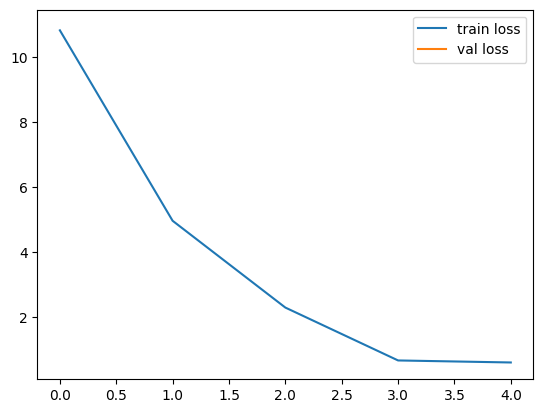

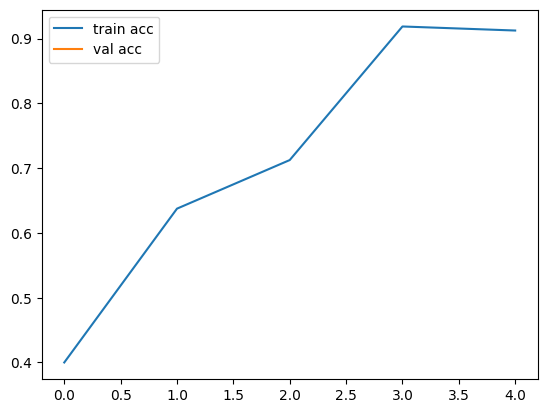

<Figure size 640x480 with 0 Axes>

In [ ]:
#plotting the loss 
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


#plotting the accuracy 
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

In [ ]:
from keras.models import load_model
final_model.save('Flower Model.h5')

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
